<a href="https://colab.research.google.com/github/Nathan-Mekuria-Solomon/ML-practice/blob/main/unsupervised_learning/gaussian_mixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gaussian Mixtures Model (GMM)

In [1]:
# generate dataset
from sklearn.datasets import make_blobs
import numpy as np

X1, y1 = make_blobs(n_samples= 1000, centers= ((4, -4), (0, 0)), random_state= 42)
X1 = X1.dot(np.array([[0.374, 0.9], [0.73, 0.555]]))
X2, y2 = make_blobs(n_samples= 250, centers= 1, random_state= 42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [2]:
# train guassian mixutre model
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components= 3, n_init= 10, random_state= 42) # n_init by default is 1
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [3]:
gm.weights_

array([0.40000013, 0.39200821, 0.20799166])

In [4]:
gm.means_

array([[-1.40024977,  1.3972425 ],
       [ 0.05687907,  0.07716933],
       [ 3.41568199,  1.05175878]])

In [5]:
gm.covariances_

array([[[ 0.63032387,  0.68073716],
        [ 0.68073716,  1.02883527]],

       [[ 0.69086451,  0.75067989],
        [ 0.75067989,  1.08236645]],

       [[ 1.11933186, -0.02003019],
        [-0.02003019,  0.94924058]]])

In [6]:
gm.converged_

True

In [7]:
gm.n_iter_

4

In [8]:
gm.predict(X)

array([1, 1, 0, ..., 2, 2, 2])

In [9]:
gm.predict_proba(X)

array([[6.57495897e-07, 9.80099451e-01, 1.98998912e-02],
       [6.62533491e-04, 9.85782145e-01, 1.35553218e-02],
       [9.99920616e-01, 7.78459463e-05, 1.53814755e-06],
       ...,
       [1.21042748e-25, 1.17269886e-06, 9.99998827e-01],
       [3.86380043e-40, 5.04437077e-15, 1.00000000e+00],
       [3.80727238e-40, 8.02140282e-15, 1.00000000e+00]])

In [10]:
# sample new instances from the model
# GMM is generative model (we can generate new instances from the model)
X_new, y_new = gm.sample(6)
X_new

array([[-2.30474086,  1.07096013],
       [-1.16109357,  1.58101256],
       [-1.39023394, -1.37782763],
       [ 3.97049795,  1.51881777],
       [ 3.85090409,  0.54495094],
       [ 2.94629083, -0.76803555]])

In [11]:
y_new # sampled sequentially

array([0, 0, 1, 2, 2, 2])

In [12]:
# log of probability density function
# we can find the probability at any small box
gm.score_samples(X)

array([-2.55341269, -3.51748904, -3.2802644 , ..., -3.51416609,
       -4.38652304, -3.79510114])

In [13]:
# integration of PDF
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)      # (start, end, step)
xx, yy = np.meshgrid(grid, grid)               # 2D of x and y coordinates
X_full = np.vstack([xx.ravel(), yy.ravel()]).T # each little box in the grid

# gm.score_samples give log probability
pdf = np.exp(gm.score_samples(X_full))
# find probability that instance will be generated in tiny box (length= 1/ resolution, width= 1/ resolution)
pdf_probas = pdf * (1 / resolution) ** 2       # pdf * area of tiny square
pdf_probas.sum()

np.float64(0.9999999999479271)

In [14]:
# function to generate decision boundaries and density contours
from matplotlib.colors import LogNorm                     # heatmap using logarithmic scale (avoid obscure of small numbers)
import matplotlib.pyplot as plt

def plot_gaussian_mixture(clusterer, X, resolution= 1000, show_ylabels= True):
  mins = X.min(axis= 0) - 0.1
  maxs = X.max(axis= 0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z,
               norm= LogNorm(vmin= 1.0, vmax= 30.0),
               levels= np.logspace(0, 2, 12))
  plt.contour(xx, yy, Z,
              norm= LogNorm(vmin= 1.0, vmax= 30.0),
              levels= np.logspace(0, 2, 12),
              linewidths= 1, colors= 'k')

  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z,
              linewidths= 2, colors= 'r', linestyles= 'dashed')

  plt.plot(X[:, 0], X[:, 1], 'k.', markersize= 2)
  plot_centroids(clusterer.means_, clusterer.weights_)

  plt.xlabel("$X_1$", fontsize= 14)
  if show_ylabels:
    plt.ylabel("$X_2$", fontsize= 14, rotation= 0)
  else:
    plt.tick_params(labelleft= False)

In [15]:
# function for plotting centroids
def plot_centroids(centroids, weights= None, circle_color= 'w', cross_color= 'k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker= 'o', s= 35, linewidths= 8)
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker= 'x', s= 2, linewidths= 12,
              color= cross_color, zorder= 11, alpha= 1)

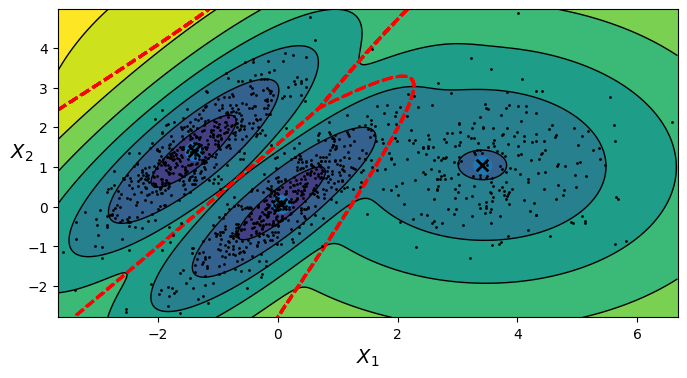

In [16]:
plt.figure(figsize= (8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

Constraint

In [17]:
gm_tied = GaussianMixture(n_components= 3, n_init= 10, covariance_type= "tied", random_state= 42)
gm_full = GaussianMixture(n_components= 3, n_init= 10, covariance_type= "full", random_state= 42)
gm_spherical = GaussianMixture(n_components= 3, n_init= 10, covariance_type= "spherical", random_state= 42)
gm_diag = GaussianMixture(n_components= 3, n_init= 10, covariance_type= "diag", random_state= 42)

gm_tied.fit(X)
gm_full.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [18]:
# function for models plot
def compare_gaussian_mixtures(gm1, gm2, X):
  plt.figure(figsize= (10, 4))

  plt.subplot(121)
  plot_gaussian_mixture(gm1, X)
  plt.title("covariance type: {}".format(gm1.covariance_type))

  plt.subplot(122)
  plot_gaussian_mixture(gm2, X)
  plt.title("covarance type: {}".format(gm2.covariance_type))

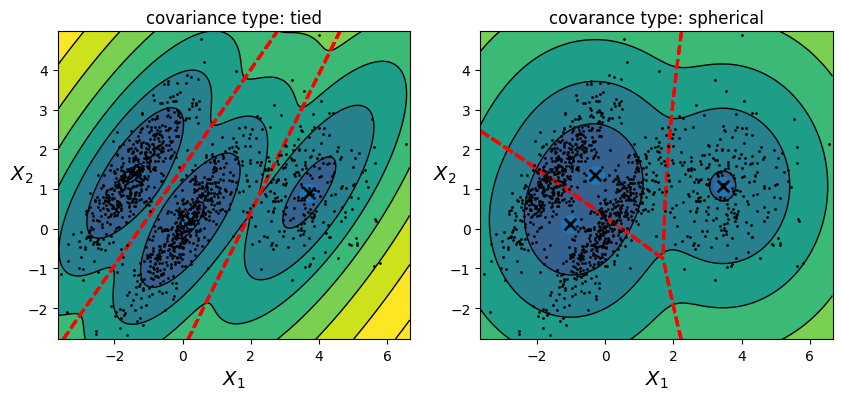

In [19]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

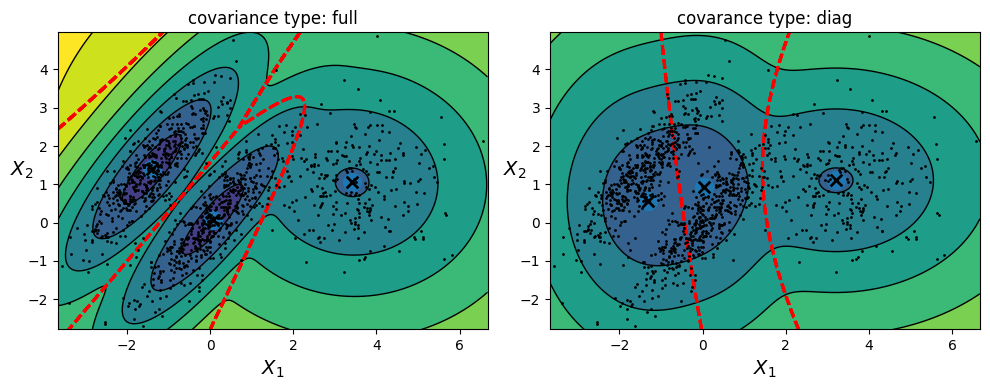

In [20]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

Anomaly Detection

In [21]:
densities = gm.score_samples(X)
densities.shape

(1250,)

In [22]:
X.shape

(1250, 2)

In [23]:
density_threshold = np.percentile(densities, 4)
density_threshold

np.float64(-5.48907469164366)

In [24]:
anomalies = X[densities < density_threshold]
anomalies.shape

(50, 2)

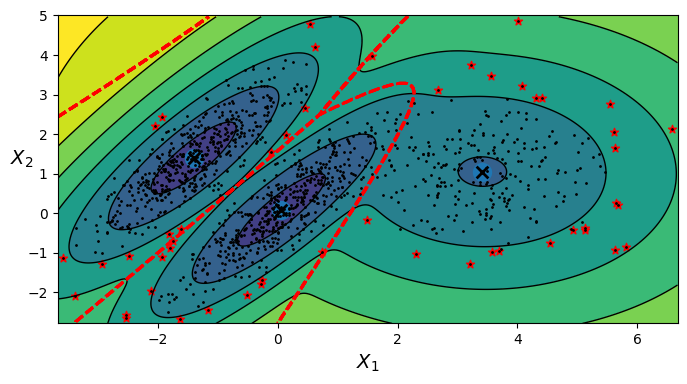

In [25]:
# plot guassian mixture with anomalies
plt.figure(figsize= (8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color= 'r', marker= '*')
plt.ylim(top= 5)
plt.show()

Gaussian mixture models with various k values and their BIC score

In [26]:
gms_per_k = [GaussianMixture(n_components= k, n_init= 10, random_state= 42).fit(X) for k in range(1, 11)]

In [27]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

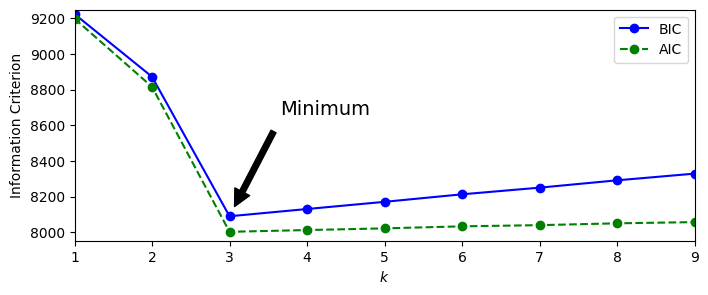

In [28]:
# plot k vs information criterion
plt.figure(figsize= (8, 3))
plt.plot(range(1, 11), bics, 'bo-', label= "BIC")
plt.plot(range(1, 11), aics, 'go--', label= "AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate("Minimum",
               xy= (3, bics[2]),
               xytext= (0.35, 0.6),
               textcoords= "figure fraction",
               fontsize= 14,
               arrowprops= dict(facecolor= "black", shrink= 0.1)
               )

plt.legend()
plt.show()

In [29]:
# Search best number of cluster and variance type
min_bic = np.inf

for k in range(1, 11):
  for covariance_type in ["full", "tied", "spherical", "diag"]:
    bic = GaussianMixture(n_components= k, covariance_type= covariance_type, n_init= 10, random_state= 42).fit(X).bic(X)

    if bic < min_bic:
      min_bic = bic
      best_k = k
      best_covariance_type = covariance_type

In [30]:
best_k

3

In [31]:
best_covariance_type

'full'

In [32]:
# Bayesian Gaussian Mixture to find the optimal cluster number
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components= 10, n_init= 10, random_state= 42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

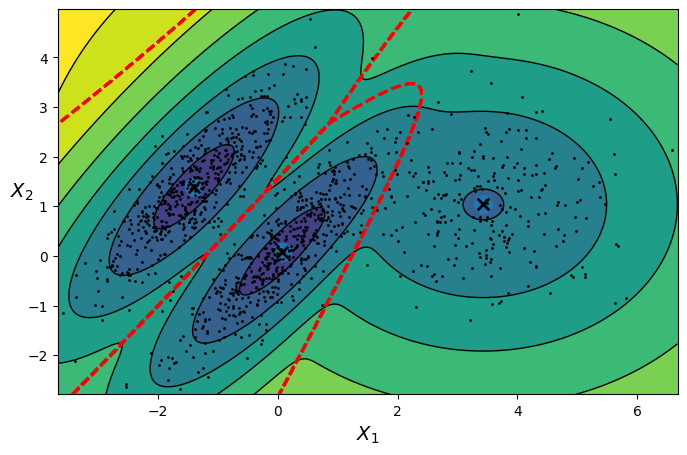

In [33]:
plt.figure(figsize= (8,5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [34]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [35]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [36]:
# split test, valid and train set
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits= 1,test_size= 40, random_state= 42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits= 1, test_size= 80, random_state= 42)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [37]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [49]:
# Reduce dimensionality using PCA to speed up training
from sklearn.decomposition import PCA

pca = PCA(0.99) # 99 per cent explain variance
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid) # Use the fitted pca to transform the validation set
X_test_pca = pca.transform(X_test) # Use the fitted pca to transform the test set

pca.n_components_

np.int64(200)

In [39]:
# Clustering using KMeans
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
  print("k={}".format(k))
  kmeans = KMeans(n_clusters= k, random_state= 42).fit(X_train_pca)
  kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


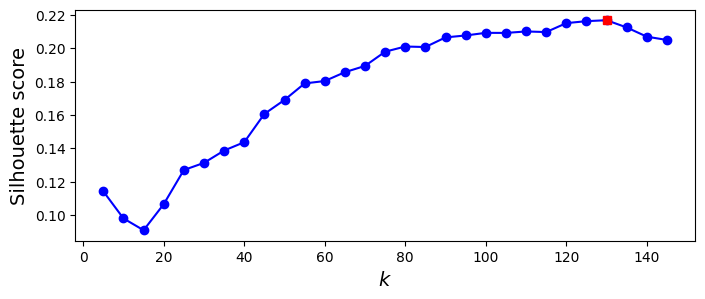

In [40]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize= (8, 3))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel("$k$", fontsize= 14)
plt.ylabel("Silhouette score", fontsize= 14)
plt.plot(best_k, best_score, 'rs')
plt.show()

In [41]:
best_k

130

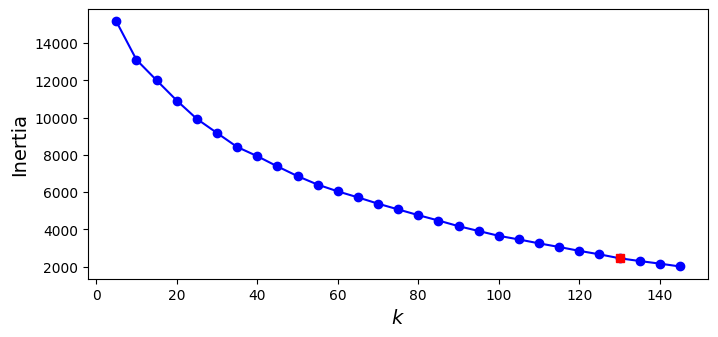

In [42]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize= (8, 3.5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel("$k$", fontsize= 14)
plt.ylabel("Inertia", fontsize= 14)
plt.plot(best_k, best_inertia, 'rs')
plt.show()

In [43]:
best_model = kmeans_per_k[best_index]

Cluster 0


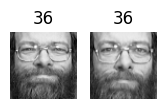

Cluster 1


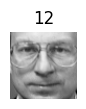

Cluster 2


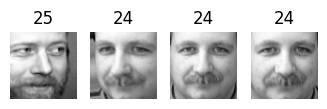

Cluster 3


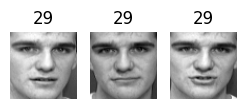

Cluster 4


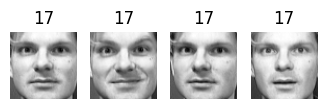

Cluster 5


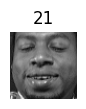

Cluster 6


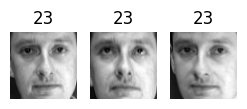

Cluster 7


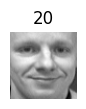

Cluster 8


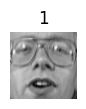

Cluster 9


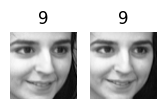

Cluster 10


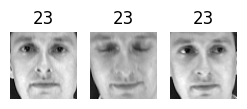

Cluster 11


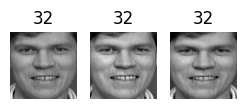

Cluster 12


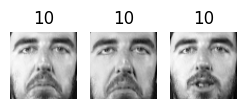

Cluster 13


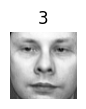

Cluster 14


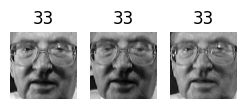

Cluster 15


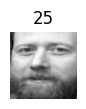

Cluster 16


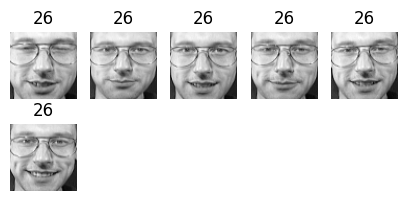

Cluster 17


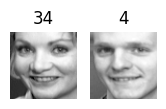

Cluster 18


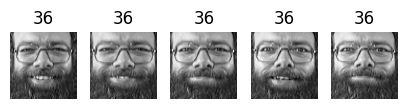

Cluster 19


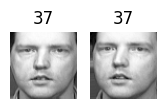

Cluster 20


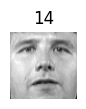

Cluster 21


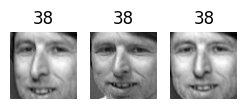

Cluster 22


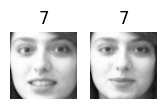

Cluster 23


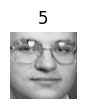

Cluster 24


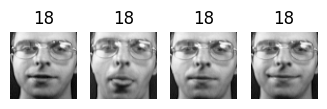

Cluster 25


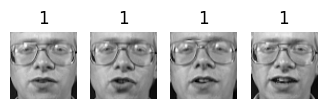

Cluster 26


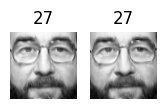

Cluster 27


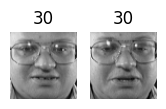

Cluster 28


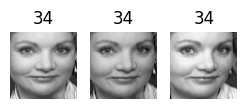

Cluster 29


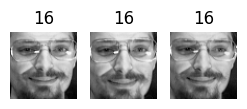

Cluster 30


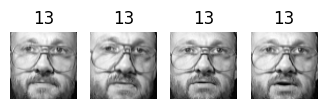

Cluster 31


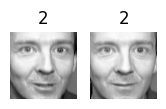

Cluster 32


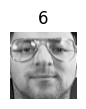

Cluster 33


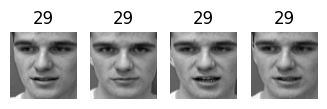

Cluster 34


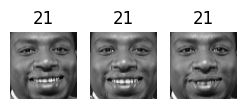

Cluster 35


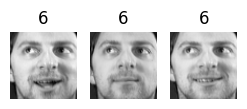

Cluster 36


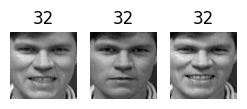

Cluster 37


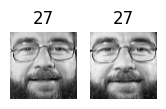

Cluster 38


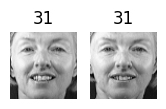

Cluster 39


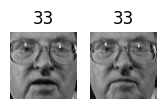

Cluster 40


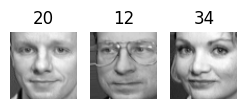

Cluster 41


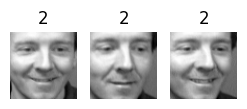

Cluster 42


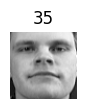

Cluster 43


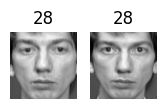

Cluster 44


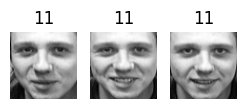

Cluster 45


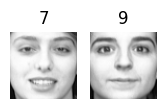

Cluster 46


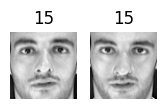

Cluster 47


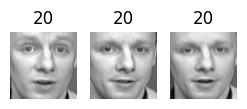

Cluster 48


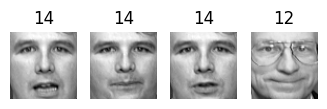

Cluster 49


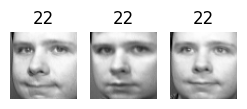

Cluster 50


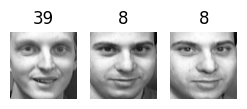

Cluster 51


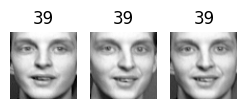

Cluster 52


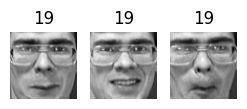

Cluster 53


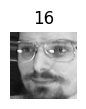

Cluster 54


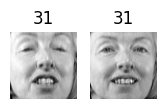

Cluster 55


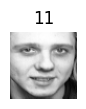

Cluster 56


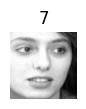

Cluster 57


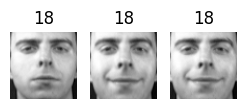

Cluster 58


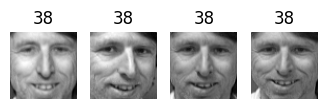

Cluster 59


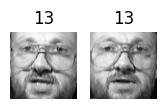

Cluster 60


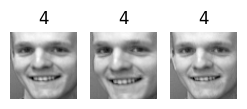

Cluster 61


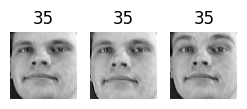

Cluster 62


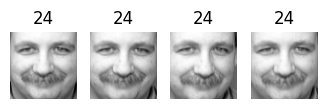

Cluster 63


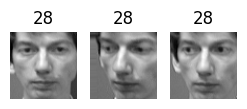

Cluster 64


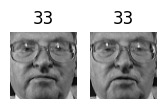

Cluster 65


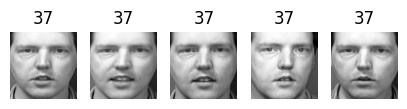

Cluster 66


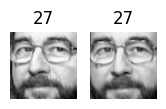

Cluster 67


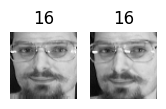

Cluster 68


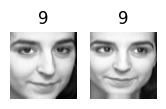

Cluster 69


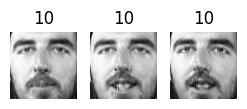

Cluster 70


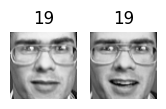

Cluster 71


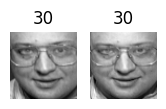

Cluster 72


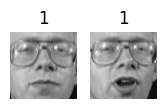

Cluster 73


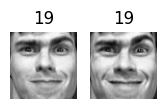

Cluster 74


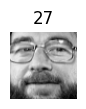

Cluster 75


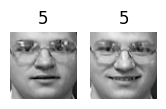

Cluster 76


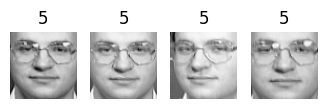

Cluster 77


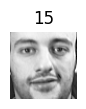

Cluster 78


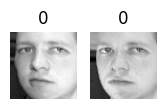

Cluster 79


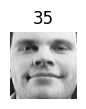

Cluster 80


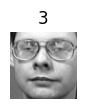

Cluster 81


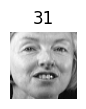

Cluster 82


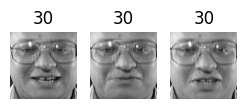

Cluster 83


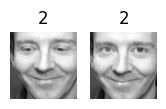

Cluster 84


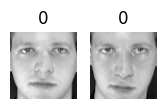

Cluster 85


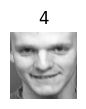

Cluster 86


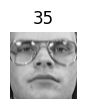

Cluster 87


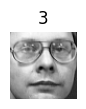

Cluster 88


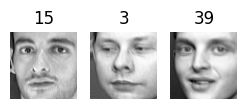

Cluster 89


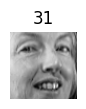

Cluster 90


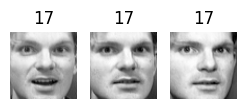

Cluster 91


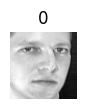

Cluster 92


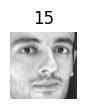

Cluster 93


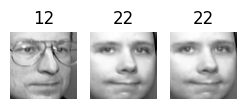

Cluster 94


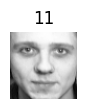

Cluster 95


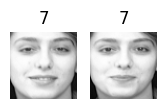

Cluster 96


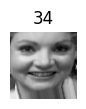

Cluster 97


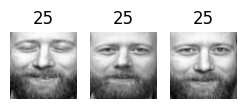

Cluster 98


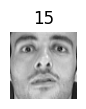

Cluster 99


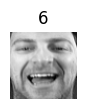

Cluster 100


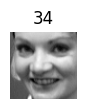

Cluster 101


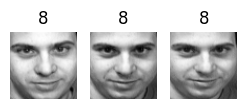

Cluster 102


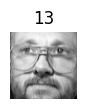

Cluster 103


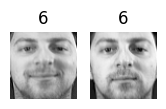

Cluster 104


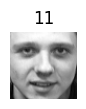

Cluster 105


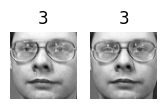

Cluster 106


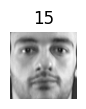

Cluster 107


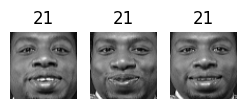

Cluster 108


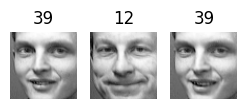

Cluster 109


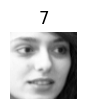

Cluster 110


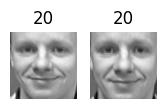

Cluster 111


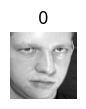

Cluster 112


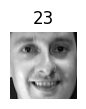

Cluster 113


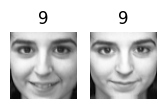

Cluster 114


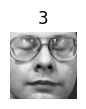

Cluster 115


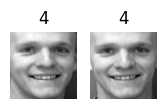

Cluster 116


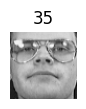

Cluster 117


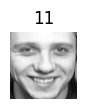

Cluster 118


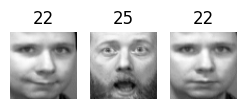

Cluster 119


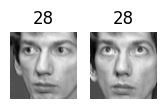

Cluster 120


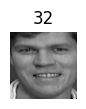

Cluster 121


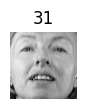

Cluster 122


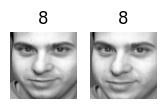

Cluster 123


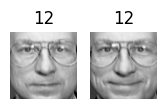

Cluster 124


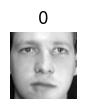

Cluster 125


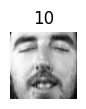

Cluster 126


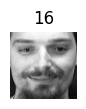

Cluster 127


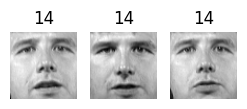

Cluster 128


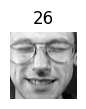

Cluster 129


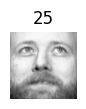

In [44]:
def plot_faces(faces, labels, n_cols= 5):
  faces = faces.reshape(-1, 64, 64)
  n_rows = (len(faces) - 1) // n_cols + 1
  plt.figure(figsize= (n_cols, n_rows * 1.1))
  for index, (face, label) in enumerate(zip(faces, labels)):
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(face, cmap= "gray")
    plt.axis("off")
    plt.title(label)
  plt.show()

for cluster_id in np.unique(best_model.labels_):
  print("Cluster", cluster_id)
  in_cluster = best_model.labels_ == cluster_id
  faces = X_train[in_cluster]
  labels = y_train[in_cluster]
  plot_faces(faces, labels)

In [50]:
# train classifier algorithm
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 150, random_state= 42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

In [51]:
# classifier after dimensionality reduction using KMeans
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators= 150, random_state= 42)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.7375

In [53]:
# finding best number of clusters
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
  pipeline = Pipeline([
      ("kmeans", KMeans(n_clusters= n_clusters, random_state= 42)),
      ("forest_clf", RandomForestClassifier(n_estimators= 150, random_state= 42))
  ])
  pipeline.fit(X_train_pca, y_train)
  print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.4875
10 0.5125
15 0.575
20 0.575
25 0.6125
30 0.7
35 0.6625
40 0.6625
45 0.675
50 0.6875
55 0.6625
60 0.675
65 0.725
70 0.6875
75 0.7
80 0.725
85 0.7
90 0.7125
95 0.7125
100 0.7
105 0.75
110 0.725
115 0.7
120 0.7375
125 0.75
130 0.7375
135 0.7625
140 0.7375
145 0.75


In [54]:
# append features of reduced dataset to the original features
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [55]:
clf = RandomForestClassifier(n_estimators= 150, random_state= 42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.7875

Gaussian Mixture Model

In [56]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components= 40, random_state= 42)
y_pred = gm.fit_predict(X_train_pca)

In [59]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples= n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

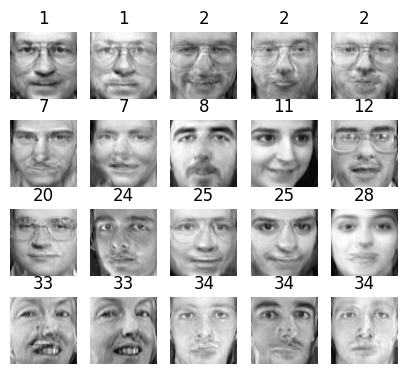

In [60]:
plot_faces(gen_faces, y_gen_faces)

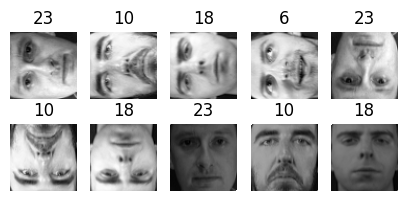

In [66]:
# tweaked images
n_rotation = 4
rotated = np.transpose(X_train[:n_rotation].reshape(-1, 64, 64), axes= [0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotation]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.2
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened] # row-wise concatenation
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [67]:
X_bad_faces_pca = pca.transform(X_bad_faces)
gm.score_samples(X_bad_faces_pca)

array([-4.60898708e+07, -3.17453096e+07, -3.02468121e+07, -4.73996004e+07,
       -3.17359131e+07, -5.27950948e+07, -4.90635787e+07, -1.60736250e+08,
       -1.43595952e+08, -1.41369190e+08])

In [68]:
# compare score with untweaked dataset
gm.score_samples(X_train_pca[:10])

array([1123.83861465, 1126.4459246 , 1126.44592303, 1176.66453373,
       1139.60074654, 1146.18455695, 1007.56476929, 1118.90303306,
       1131.05139328, 1160.15653866])

In [70]:
X_train_pca

array([[-2.2095535 , -8.177852  , -3.1609056 , ..., -0.10565285,
        -0.11277816, -0.12376972],
       [ 2.879546  ,  5.852722  , -3.1102605 , ...,  0.19481312,
         0.07904413,  0.09705279],
       [ 3.7210033 ,  3.7166786 , -1.6135874 , ..., -0.10774592,
        -0.06856085,  0.02084041],
       ...,
       [-0.02803454,  1.4935058 ,  2.3138201 , ..., -0.12838493,
         0.06186023,  0.01100836],
       [ 2.036648  ,  2.0573673 ,  1.7076192 , ...,  0.11621337,
         0.04620475,  0.02860593],
       [-4.334069  , -0.784225  , -1.6855756 , ..., -0.14180529,
         0.18896377, -0.02670156]], dtype=float32)

In [72]:
# Anomaly detection using reconstruction error
def reconstruction_errors(pca, X):
  X_pca = pca.transform(X)
  X_reconstructed = pca.inverse_transform(X_pca)
  mse = np.square(X_reconstructed - X).mean(axis= -1)
  return mse

In [73]:
reconstruction_errors(pca, X_train).mean()

np.float32(0.00018892145)

In [74]:
reconstruction_errors(pca, X_bad_faces).mean()

np.float32(0.006294357)

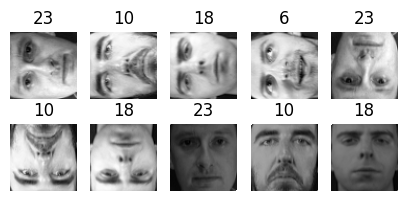

In [76]:
# plot tweaked faces
plot_faces(X_bad_faces, y_bad)

In [78]:
# reconstructed images
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)